Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7128 - loss: 0.5846 - val_accuracy: 0.8338 - val_loss: 0.3746
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8770 - loss: 0.2902 - val_accuracy: 0.8376 - val_loss: 0.3645
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9321 - loss: 0.1861 - val_accuracy: 0.8287 - val_loss: 0.4050
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9665 - loss: 0.1083 - val_accuracy: 0.8237 - val_loss: 0.4820
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9886 - loss: 0.0488 - val_accuracy: 0.8165 - val_loss: 0.5804
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9977 - loss: 0.0191 - val_accuracy: 0.8167 - val_loss: 0.6765
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9998 - loss: 0.0061 - val_accuracy: 0.8130 - val_loss: 0.7598
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.

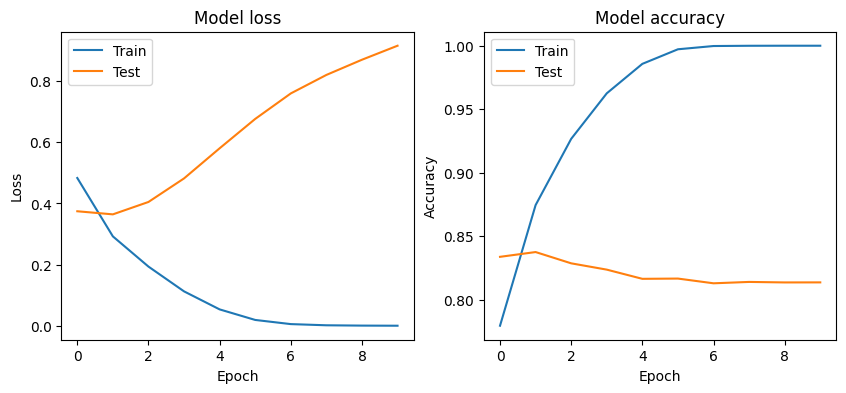

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
import matplotlib.pyplot as plt


# load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# pad the sequences in the X_train and X_test lists
max_length = 80
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# create a deep neural network model
model = Sequential()
model.add(Embedding(10000, 64, input_length=max_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


# plot the test loss and test accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()